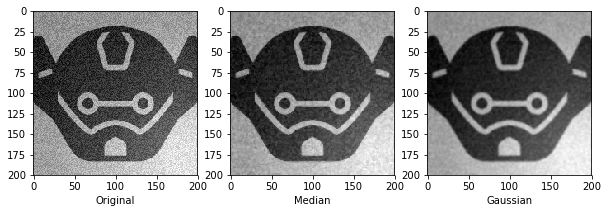

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.ndimage.filters import median_filter
from scipy import ndimage as nimg
import cv2
import random
%matplotlib inline

img1 = cv2.imread('./data2/Head/1859.png',0)
newImg_1 = nimg.gaussian_filter(img1, sigma=1)
newImg = median_filter(img1, 3)
fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.xlabel("Original")
plt.imshow(img1,cmap='gray')
plt.subplot(132)
plt.xlabel("Median")
plt.imshow(newImg,cmap='gray')
plt.subplot(133)
plt.xlabel("Gaussian")
plt.imshow(newImg_1,cmap='gray')
plt.show()

C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


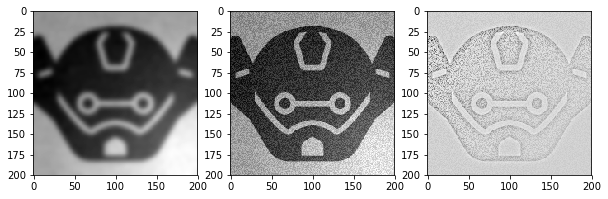

In [6]:
img1 = img.imread('./data2/Head/1859.png')
newImg_1 = nimg.gaussian_filter(img1, sigma=3)
mxVl = (img1-newImg_1).max()
mnVl = (img1-newImg_1).min()
diff = np.log2(img1)-np.log2(newImg_1)
newIm = (diff-mnVl)/(mxVl-mnVl)
fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(newImg_1,cmap='gray')
plt.subplot(132)
plt.imshow(img1,cmap='gray')
plt.subplot(133)
plt.imshow(newIm,cmap='gray')
plt.show()

In [15]:
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import numpy as np
import os,sys

path = "/Users/MakpalPC/Machine Vision/final/data2/Head"
dirs = os.listdir(path)
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '_rsz.png', 'PNG', quality=95)
resize()

In [17]:
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    r'data2//Arms//',
    r'data2//Figure_normal_legs//',
    r'data2//FigureWheels//',
    r'data2//Head//',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
print(X_datasets)
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, sizes[idx]))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    

[]
data2//Arms//
Could not read: data2//Arms//Thumbs.db : cannot identify image file 'data2//Arms//Thumbs.db' - it's ok, skipping.
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
data2//Figure_normal_legs//
Could not read: data2//Figure_normal_legs//Thumbs.db : cannot identify image file 'data2//Figure_normal_legs//Thumbs.db' - it's ok, skipping.
Full dataset tensor: (622, 50, 50)
Mean: 0.0886578
Standard deviation: 0.17902
data2//FigureWheels//
Could not read: data2//FigureWheels//Thumbs.db : cannot identify image file 'data2//FigureWheels//Thumbs.db' - it's ok, skipping.
Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
data2//Head//
Could not read: data2//Head//Thumbs.db : cannot identify image file 'data2//Head//Thumbs.db' - it's ok, skipping.
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (2101, 50, 50)
Samples for tests: 526
Samples for trains: 1575


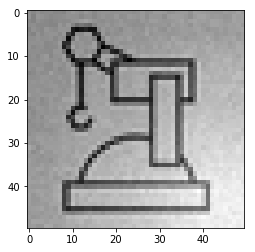

In [18]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [21]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/16), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/32), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('sigmoid', name="sigmoid"))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains,
          Y_trains,
          epochs=30,
          batch_size=20,
          verbose=2,
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=2, sample_weight=None)
# round predictions
print(results)

(50, 50)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2500)              6252500   
_________________________________________________________________

C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(625, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(312, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(156, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC


dense_8 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_9 (Dense)              (None, 625)               781875    
_________________________________________________________________
dense_10 (Dense)             (None, 312)               195312    
_________________________________________________________________
dense_11 (Dense)             (None, 156)               48828     
_________________________________________________________________
dense_12 (Dense)             (None, 78)                12246     
_________________________________________________________________
output (Dense)               (None, 4)                 316       
_________________________________________________________________
sigmoid (Activation)         (None, 4)                 0         
Total params: 10,417,327
Trainable params: 10,417,327
Non-trainable params: 0
_______________________________________________________________

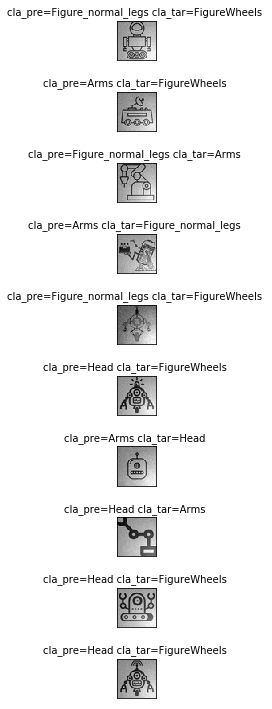

In [20]:
clazzez = ['Arms','Figure_normal_legs','FigureWheels','Head']
results = model.predict(X_tests)
errors = list()
for idx in range(len(results)):
    res = results[idx]
    cla_pre = clazzez[np.argmax(res)]
    cla_tar = clazzez[np.argmax(Y_tests[idx])]
    if cla_pre!=cla_tar:
#         print(cla_pre,cla_tar)
        errors.append(idx)
# print(errors)

problems = 10
fig, axes = plt.subplots(problems, figsize=(10,10))
fig.tight_layout()
for idx in range(problems):
    err = errors[idx]
    cla_pre = clazzez[np.argmax(results[err])]
    cla_tar = clazzez[np.argmax(Y_tests[err])]    
    
    axes[idx].imshow(X_tests[err],cmap='gray')
    axes[idx].set_title("cla_pre=%s cla_tar=%s " % (cla_pre,cla_tar), fontsize=10)
    axes[idx].set_xticks([]) 
    axes[idx].set_yticks([])